In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import datetime
import xlrd
from datetime import datetime
import plotly.express as px


In [2]:
Data_cab = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")

In [3]:
Data_city = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")

In [4]:
Data_customer = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")

In [5]:
Data_transaction = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")

In [6]:
####################################################################################################
#                                                                                                  #
#                                         Understanding the data                                   #
#                                                                                                  #
####################################################################################################

In [7]:
######## Cab Data

In [8]:
Data_cab.shape

(359392, 7)

In [9]:
Data_cab.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [10]:
Data_cab.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [11]:
Data_cab["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [12]:
######## Customer Data

In [13]:
Data_customer.shape

(49171, 4)

In [14]:
Data_customer.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [15]:
Data_customer.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

In [16]:
######## City Data

In [17]:
Data_city.shape

(20, 3)

In [18]:
Data_city.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [19]:
Data_city.nunique()

City          20
Population    20
Users         20
dtype: int64

In [20]:
######## transaction Data

In [21]:
Data_transaction.shape

(440098, 3)

In [22]:
Data_transaction.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [23]:
Data_transaction.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [24]:
####################################################################################################
#                                                                                                  #
#                                         Cleaning the data                                        #
#                                                                                                  #
####################################################################################################

In [25]:
#checking for null values

In [26]:
Data_cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [27]:
Data_city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [28]:
Data_customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [29]:
Data_transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [30]:
# => no nulls in data sets

In [31]:
####### removing outliers

In [32]:
Data_cab['Profit'] = (Data_cab['Price Charged'] -  Data_cab['Cost of Trip'])

In [33]:
Data_cab['Profit/KM'] = (Data_cab['Profit'] /  Data_cab['KM Travelled'])

In [34]:
Data_cab = Data_cab[(np.abs(stats.zscore(Data_cab['Profit/KM'])) < 3)]

In [35]:
####### removing unuseful data

In [36]:
Data_cab["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [37]:
Data_city[~Data_city.City.isin(Data_cab["City"].unique())]

,City,Population,Users
14,SAN FRANCISCO CA,"629,591","213,609"


In [38]:
Data_city = Data_city.drop(Data_city[Data_city.City == "SAN FRANCISCO CA"].index)


In [39]:
Data_transaction = Data_transaction.drop(Data_transaction[~Data_transaction['Transaction ID'].isin(Data_cab["Transaction ID"])].index)
Data_transaction.shape

(356201, 3)

In [40]:
####################################################################################################
#                                                                                                  #
#                                         Exploring the data                                       #
#                                                                                                  #
####################################################################################################

In [41]:
meta_cab = pd.merge(Data_transaction, Data_cab, on=["Transaction ID"])
meta_cab.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit/KM
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439


In [42]:
meta_cab["Date of Travel"] = meta_cab["Date of Travel"].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))


In [43]:
meta_cab['Month'] = pd.DatetimeIndex(meta_cab['Date of Travel']).month

In [44]:
meta_cab['Year'] = pd.DatetimeIndex(meta_cab['Date of Travel']).year

In [45]:
meta_cab = meta_cab.drop(["Date of Travel"], axis=1)

In [46]:
meta_cab.head()

,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit/KM,Month,Year
0,10000011,29290,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,1,2016
1,10000012,27703,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904,1,2016
2,10000013,28712,Cash,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558,1,2016
3,10000014,28020,Cash,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751,1,2016
4,10000015,27182,Card,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439,1,2016


In [ ]:
#### Splitting data 

In [89]:
pink_cab = meta_cab[meta_cab.Company == "Pink Cab"]

In [90]:
yellow_cab = meta_cab[meta_cab.Company == "Yellow Cab"]

In [50]:
yellow_cab.nunique()

Transaction ID    271508
Customer ID        39866
Payment_Mode           2
Company                1
City                  19
KM Travelled         874
Price Charged      95568
Cost of Trip        9808
Profit            247250
Profit/KM         269753
Month                 12
Year                   3
dtype: int64

In [51]:
yellow_cab.describe()

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Profit,Profit/KM,Month,Year
count,2.715080e+05,271508.000000,271508.000000,271508.000000,271508.000000,271508.000000,271508.000000,271508.000000,271508.000000
mean,1.022088e+07,19630.997812,22.568315,453.428036,297.960137,155.467898,6.894823,7.442072,2017.048032
std,1.269566e+05,21872.295805,12.235088,282.168095,162.591637,163.531413,5.479566,3.465442,0.801362
min,1.000038e+07,1.000000,1.900000,20.730000,22.800000,-176.930800,-4.998235,1.000000,2016.000000
25%,1.011130e+07,2465.000000,11.990000,225.340000,158.400000,36.619900,2.571176,5.000000,2016.000000
50%,1.022135e+07,6615.000000,22.440000,422.460000,295.596000,100.288400,5.513526,8.000000,2017.000000
75%,1.033012e+07,40707.750000,32.960000,629.280000,432.561600,223.589900,10.677754,10.000000,2018.000000
max,1.044011e+07,60000.000000,48.000000,1740.300000,691.200000,1081.900000,22.713256,12.000000,2018.000000


In [58]:
########## frequency of transaction in each month

In [52]:
frequency_yellow = yellow_cab.groupby(['Month']).size().reset_index(name='Transactions')

In [53]:
frequency_yellow.head(12)

,Month,Transactions
0,1,17812
1,2,14437
2,3,17062
3,4,16965
4,5,17858
5,6,18309
6,7,21034
7,8,23583
8,9,27165
9,10,30233


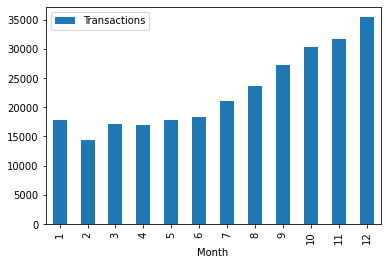

In [54]:
frequency_yellow.plot(kind='bar',x="Month",y="Transactions")

In [66]:
frequency_pink = pink_cab.groupby(['Month']).size().reset_index(name='Transactions')

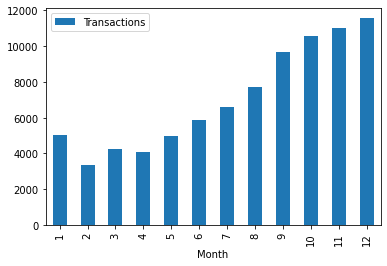

In [60]:
frequency_pink.plot(kind='bar',x="Month",y="Transactions")

In [242]:
season_yellow = frequency_yellow.groupby(pd.cut(frequency_yellow["Month"], np.arange(0, 13, 3))).agg(Transactions = ('Transactions', 'sum')).astype({'Transactions':int}).reset_index()

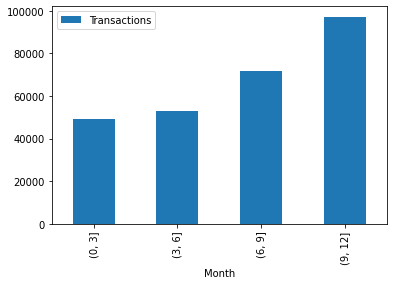

In [243]:
season_yellow.plot(kind='bar',x="Month",y="Transactions")

In [246]:
season_pink = frequency_pink.groupby(pd.cut(frequency_pink["Month"], np.arange(0, 13, 3))).agg(Transactions = ('Transactions', 'sum')).astype({'Transactions':int}).reset_index()

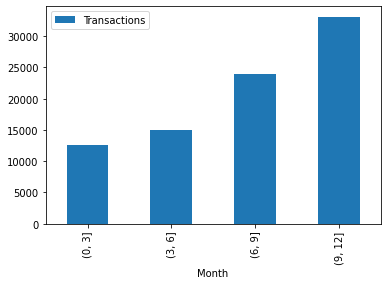

In [247]:
season_pink.plot(kind='bar',x="Month",y="Transactions")

In [ ]:
#
#Both Yellow and Pink have the same trend where the freauency of transactions tends to increase during the period between October and December 
#This increassed could be explained by weather conditions as people need taxis more, and the increased activity during christmas season
#Howeverm Yellow company seems to have a higher number of transcations than Pink
#

In [61]:
########## gender 

In [197]:
customer_yellow = yellow_cab.drop(['Transaction ID', 'Price Charged', 'Cost of Trip', 'Profit/KM', 'Month', 'Year', 'Payment_Mode'], axis=1)


In [199]:
rides_yellow = customer_yellow.groupby(['Customer ID']).size().reset_index(name='Num Rides')


In [200]:
rides_yellow = pd.merge(Data_customer, rides_yellow, on=["Customer ID"])


,Customer ID,Gender,Age,Income (USD/Month),Num Rides
0,29290,Male,28,10813,2
1,27703,Male,27,9237,2
2,28712,Male,53,11242,3
3,28020,Male,23,23327,1
4,27182,Male,33,8536,3


In [201]:
genderRides_yellow = rides_yellow.groupby(['Gender']).agg(Num_Rides = ('Num Rides', 'sum')).astype({'Num_Rides':int}).reset_index()

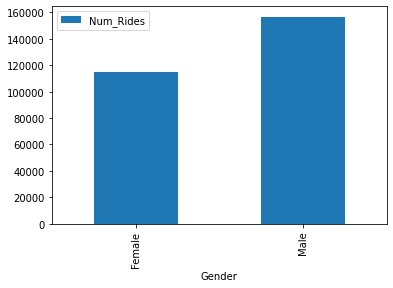

In [202]:
genderRides_yellow.plot(kind='bar',x="Gender",y="Num_Rides")

In [ ]:
# 

In [203]:
customerGrouped_yellow = customer_yellow.groupby(['Customer ID']).sum().reset_index()

In [204]:
customerGrouped_yellow.head()

,Customer ID,KM Travelled,Profit
0,1,582.81,7550.6008
1,2,777.69,9925.2516
2,3,819.75,10376.2220
3,4,608.77,7870.5356
4,5,499.57,7305.3336


In [205]:
customerGrouped_yellow = pd.merge(Data_customer, customerGrouped_yellow, on=["Customer ID"])

In [206]:
genderProfit_yellow = customerGrouped_yellow.groupby(['Gender']).agg(Profit = ('Profit', 'sum')).astype({'Profit':int}).reset_index()

In [207]:
genderProfit_yellow.head()

,Gender,Profit
0,Female,17440220
1,Male,24770558


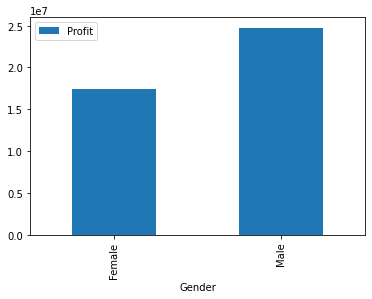

In [208]:
genderProfit_yellow.plot(kind='bar',x="Gender",y="Profit")

In [209]:
#####pink

In [210]:
customer_pink = pink_cab.drop(['Transaction ID', 'Price Charged', 'Cost of Trip', 'Profit/KM', 'Month', 'Year', 'Payment_Mode'], axis=1)

In [211]:
rides_pink = customer_pink.groupby(['Customer ID']).size().reset_index(name='Num Rides')


In [212]:
rides_pink = pd.merge(Data_customer, rides_pink, on=["Customer ID"])


In [213]:
genderRides_pink = rides_pink.groupby(['Gender']).agg(Num_Rides = ('Num Rides', 'sum')).astype({'Num_Rides':int}).reset_index()

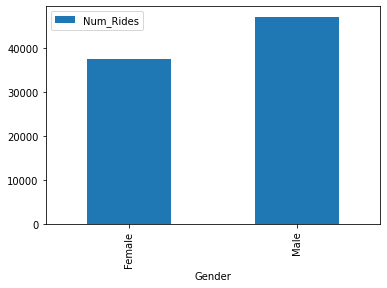

In [214]:
genderRides_pink.plot(kind='bar',x="Gender",y="Num_Rides")

In [215]:
customerGrouped_pink = customer_pink.groupby(['Customer ID']).sum().reset_index()

In [216]:
customerGrouped_pink = pd.merge(Data_customer, customerGrouped_pink, on=["Customer ID"])

In [217]:
genderProfit_pink = customerGrouped_pink.groupby(['Gender']).agg(Profit = ('Profit', 'sum')).astype({'Profit':int}).reset_index()

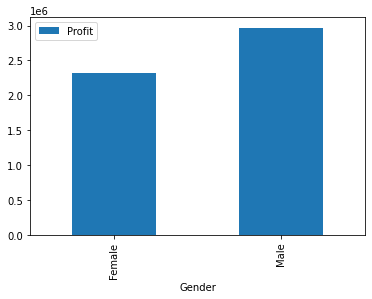

In [218]:
genderProfit_pink.plot(kind='bar',x="Gender",y="Profit")

In [337]:
#
#Income from male customers is higher than that for female customers, this is explained by the difference in the number of transactions
#betwwen males and females as yellow company has a higher number of rides for males than that for females

In [ ]:
#### age

In [219]:
age_yellow = rides_yellow.groupby(pd.cut(rides_yellow["Age"], np.arange(18, 68, 9))).agg(Num_Rides = ('Num Rides', 'sum')).astype({'Num_Rides':int}).reset_index()

,Age,Num_Rides
0,"(18, 27]",80184
1,"(27, 36]",76274
2,"(36, 45]",49092
3,"(45, 54]",26614
4,"(54, 63]",25770


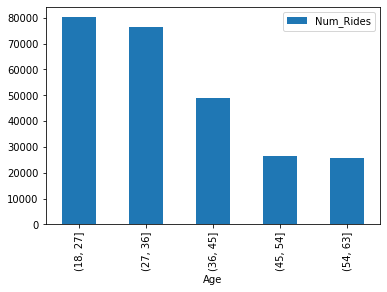

In [221]:
age_yellow.plot(kind='bar',x="Age",y="Num_Rides")

In [222]:
age_pink = rides_pink.groupby(pd.cut(rides_pink["Age"], np.arange(18, 68, 9))).agg(Num_Rides = ('Num Rides', 'sum')).astype({'Num_Rides':int}).reset_index()

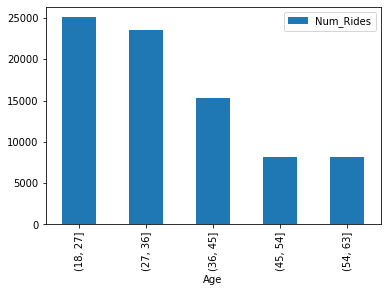

In [223]:
age_pink.plot(kind='bar',x="Age",y="Num_Rides")

In [ ]:
#
# Both companies have the same focus of age groups, as the dominant age group amon users is between 18 and 27m followed by those betweem 27 and 36.
#The number of users drastically decreases for the rest of age groups

In [224]:
##### Cities

In [225]:
cities_yellow = customer_yellow.groupby(['City']).size().reset_index(name='Num Rides')
cities_yellow.head()

,City,Num Rides
0,ATLANTA GA,5791
1,AUSTIN TX,3026
2,BOSTON MA,24506
3,CHICAGO IL,47264
4,DALLAS TX,5628


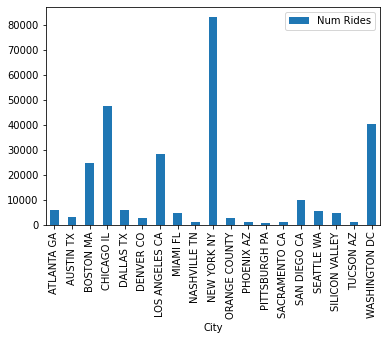

In [228]:
cities_yellow.plot(kind='bar',x="City",y="Num Rides")

In [226]:
cities_pink = customer_pink.groupby(['City']).size().reset_index(name='Num Rides')


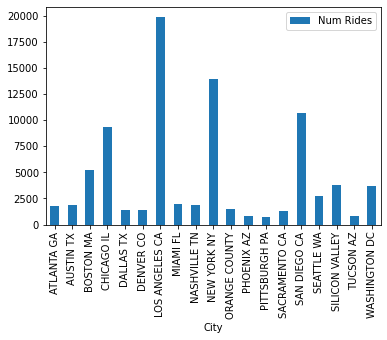

In [229]:
cities_pink.plot(kind='bar',x="City",y="Num Rides")

In [ ]:
#
# Both companies have different focus when it comes to geographical areas. Yellow is more active in the Easter cities such as New Yor, Bostin, and Washington DC.
# Pink company is more active in Western cities such as Los Angeles and San Diego

In [304]:
custCity_yellow = customer_yellow.groupby(['City']).agg(Customers = ('Customer ID', 'count')).astype({'Customers':int}).reset_index()

In [305]:
custCity_pink = customer_pink.groupby(['City']).agg(Customers = ('Customer ID', 'count')).astype({'Customers':int}).reset_index()

In [306]:
 custCity_yellow = pd.merge(Data_city, custCity_yellow, on=["City"])

In [307]:
 custCity_pink = pd.merge(Data_city, custCity_pink, on=["City"])


In [308]:
custCity_yellow['Market Share'] = (custCity_yellow['Customers'] / (custCity_yellow['Users'].str.replace(',','')).astype(int)) *100

In [309]:
custCity_pink['Market Share'] = (custCity_pink['Customers'] / (custCity_pink['Users'].str.replace(',','')).astype(int)) *100

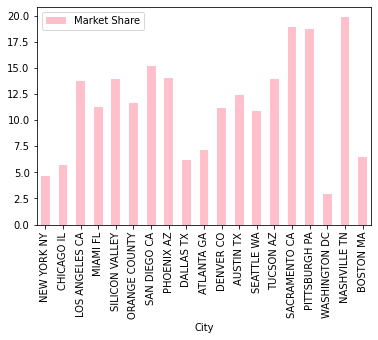

In [336]:
custCity_pink.plot(kind='bar', x='City' , y='Market Share',color='pink')

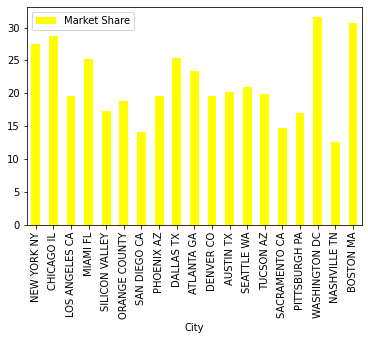

In [335]:
custCity_yellow.plot(kind='bar', x='City' , y='Market Share',color='yellow')

In [ ]:
#
# When it comes to market share, Yellow has a higher and a more consistent share among all of the cities considered as it has at least 15% market share in every city
# while Pink's market share varies from one city to another and is only high in cities where it has a high number of transactions
#

In [230]:
############# Profit analysis

In [250]:
yearlyProfit_yellow = yellow_cab.groupby(['Year']).agg(Profit = ('Profit', 'sum')).astype({'Profit':int}).reset_index()

In [278]:
yearlyProfit_pink = pink_cab.groupby(['Year']).agg(Profit = ('Profit', 'sum')).astype({'Profit':int}).reset_index()

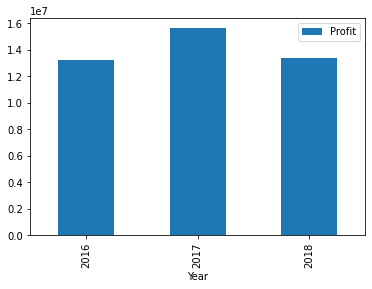

In [279]:
yearlyProfit_yellow.plot(kind='bar', x='Year' , y='Profit' )


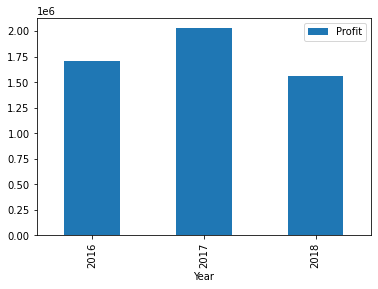

In [280]:
yearlyProfit_pink.plot(kind='bar', x='Year' , y='Profit' )


In [269]:
monthlyProfit_pink = pink_cab.groupby(['Month']).agg(Profit = ('Profit', 'mean')).astype({'Profit':int}).reset_index()

In [270]:
monthlyProfit_yellow = yellow_cab.groupby(['Month']).agg(Profit = ('Profit', 'mean')).astype({'Profit':int}).reset_index()

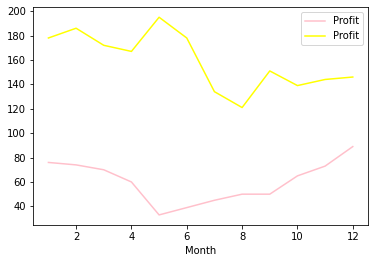

In [274]:
ax = plt.gca()

monthlyProfit_pink.plot(kind='line', x='Month' , y='Profit',color='pink' ,ax=ax,  )
monthlyProfit_yellow.plot(kind='line', x='Month' , y='Profit',color='yellow' ,ax=ax )


In [ ]:
#
# The overall profit for Yellow is higher than that for Pink company. The average profits for both companies are negativelhy correlated,
# eventhough they share the same trend towards the start of the year they have opposing trends though the rest of the seasons